# Group Members

1. Abdullahil Kafi
2. Israt Nowshin
3. MD Zahangir Hossain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image



# First Try with MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(60000, 784)

x_test = x_test[:1000]
y_test = y_test[:1000]
x_test = x_test.reshape(1000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [ ]:
input_img = Input(shape=(784,))


encoder1 = Dense(128, activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1)


decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)


autoencoder = Model(inputs=input_img, outputs=decoder2)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2809 - val_loss: 0.2498
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2499 - val_loss: 0.2372
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2410 - val_loss: 0.2295
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2300 - val_loss: 0.2161
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2170 - val_loss: 0.2084
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2116 - val_loss: 0.2057
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2092 - val_loss: 0.2041
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2077 - val_loss: 0.2030
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2067 - val_loss: 0.2020
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2057 - val_loss: 0.2013

In [ ]:

encoder = Model(inputs=input_img, outputs=encoder2)

encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [ ]:
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

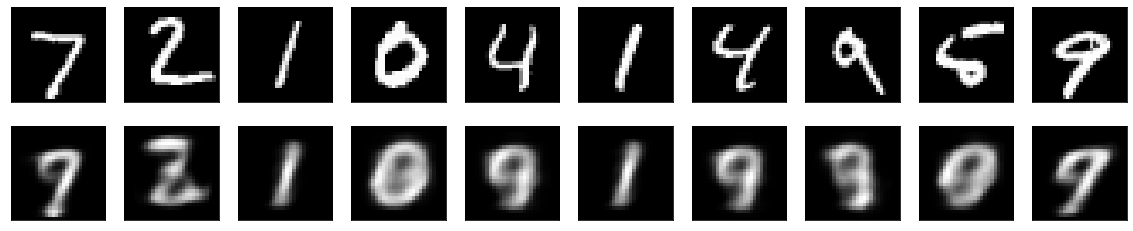

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Fashion MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)

x_test = x_test[:2000]
y_test = y_test[:2000]
x_test = x_test.reshape(2000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [ ]:
input_img = Input(shape=(784,))


encoder1 = Dense(128, activation='relu')(input_img)
encoder2 = Dense(3, activation='relu')(encoder1)


decoder1 = Dense(128, activation='relu')(encoder2)
decoder2 = Dense(784, activation='relu')(decoder1)


autoencoder = Model(inputs=input_img, outputs=decoder2)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 1.4478 - val_loss: 1.3930
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 1.3626 - val_loss: 1.4896
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 1.3146 - val_loss: 1.3051
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 1.2918 - val_loss: 1.2911
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 1.2515 - val_loss: 1.2340


In [ ]:

encoder = Model(inputs=input_img, outputs=encoder2)

encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [ ]:
latent_vector = encoder.predict(x_test)
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

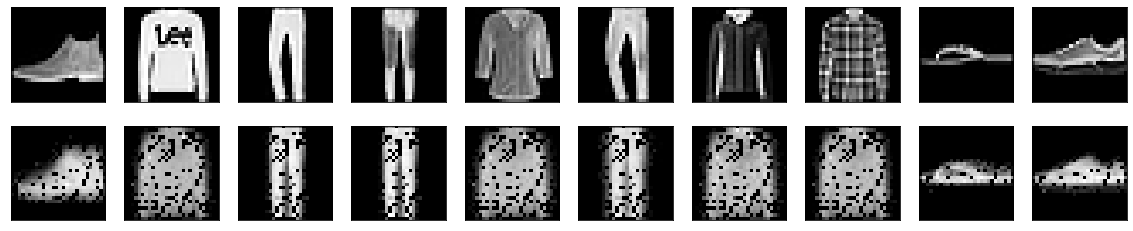

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# CONVOLUTIONAL AUTOENCODER


# MNIST DATA

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

In [ ]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

In [ ]:
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [ ]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1249 - val_loss: 0.1210
Epoch 2/10
469/469 [==============================] - 80s 170ms/step - loss: 0.1194 - val_loss: 0.1162
Epoch 3/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1159 - val_loss: 0.1134
Epoch 4/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1133 - val_loss: 0.1110
Epoch 5/10
469/469 [==============================] - 82s 175ms/step - loss: 0.1111 - val_loss: 0.1091
Epoch 6/10
469/469 [==============================] - 83s 176ms/step - loss: 0.1091 - val_loss: 0.1071
Epoch 7/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1075 - val_loss: 0.1058
Epoch 8/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1061 - val_loss: 0.1046
Epoch 9/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1050 - val_loss: 0.1033
Epoch 10/10
469/469 [==============================] - 84s 178ms/step - l

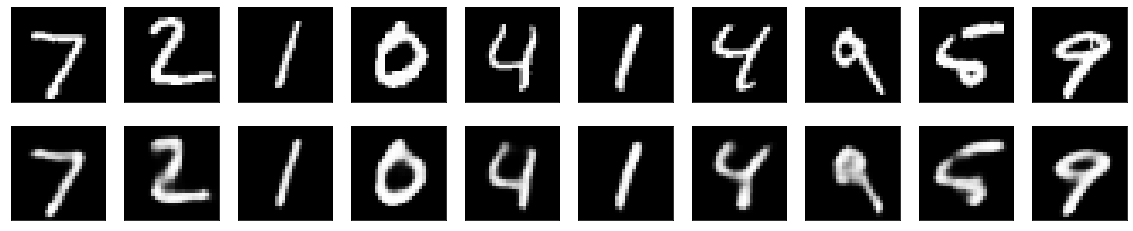

In [ ]:
# Visualize 
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Fashion MNIST


In [12]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

In [14]:
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [15]:
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0   

In [16]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 81s 172ms/step - loss: 0.3590 - val_loss: 0.3116
Epoch 2/10
469/469 [==============================] - 81s 172ms/step - loss: 0.3035 - val_loss: 0.3013
Epoch 3/10
469/469 [==============================] - 80s 172ms/step - loss: 0.2970 - val_loss: 0.2973
Epoch 4/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2936 - val_loss: 0.2942
Epoch 5/10
469/469 [==============================] - 85s 181ms/step - loss: 0.2913 - val_loss: 0.2924
Epoch 6/10
469/469 [==============================] - 78s 167ms/step - loss: 0.2897 - val_loss: 0.2913
Epoch 7/10
469/469 [==============================] - 78s 166ms/step - loss: 0.2885 - val_loss: 0.2899
Epoch 8/10
469/469 [==============================] - 78s 167ms/step - loss: 0.2875 - val_loss: 0.2893
Epoch 9/10
469/469 [==============================] - 78s 167ms/step - loss: 0.2866 - val_loss: 0.2882
Epoch 10/10
469/469 [==============================] - 78s 166ms/step - l

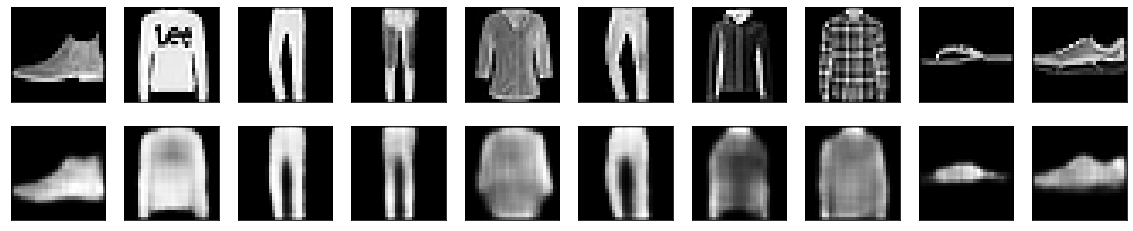

In [ ]:
# Visualize 
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

References :

(1) https://www.tensorflow.org/tutorials/generative/cvae
(2) https://www.pyimagesearch.com/2020/02/17/autoencoders-with-keras-tensorflow-and-deep-learning/